In [1]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

c:\Users\emili\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States') ].copy()

In [ ]:
#Drop NaN values from the column for plotting
df_DA_US =  df_DA_US.dropna(subset=['salary_year_avg'])

<Axes: >

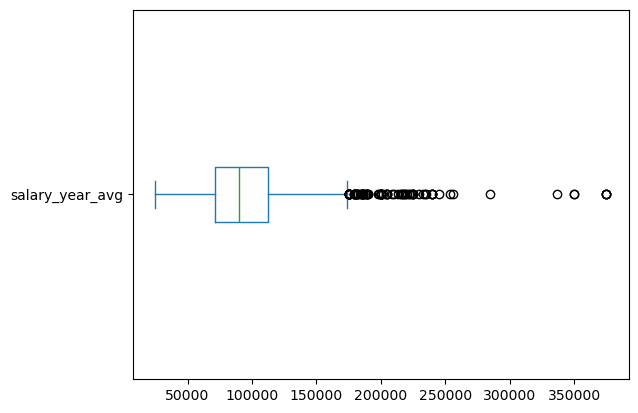

In [4]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)

In [7]:
# vamos fazer os graficos de boxplots para 3 diferentes profissoes
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter the data  to appropriate job titles
# only get data analyst jobs

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US =  df_US.dropna(subset=['salary_year_avg'])

In [9]:
# Para cada job title vou criar a serie de dados
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

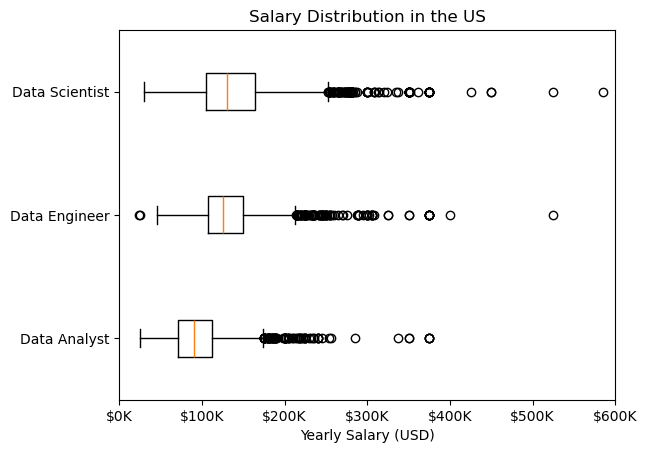

In [12]:
# Vou plotar os 3 boxplots
import matplotlib.ticker as mticker 
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary (USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))   # FuncFormatter
plt.xlim(0,600000)
plt.show()